The purpose of this notebook is to show descriptive statistics about the data. It helps to get insight into the data to help answer certain questions.

    -On average, how much do customers spend?
    -What is the typical price of items?
    -Which types of products are the most popular by characteristics?
    -What portion of customers spend low, high, or medium?
    -Are the prices helping sales?
    -What is the general trend of sales?
    -Find any data handling that needs to be done to properly predict in another notebook.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.ExcelFile('Fashion Data/DataPenjualanFashion.xlsx')

print(data.sheet_names)

data = pd.read_excel('Fashion Data/DataPenjualanFashion.xlsx', sheet_name=None)

['DASHBOARD', 'SalesItems', 'ProductItems', 'Pivot Table']


c:\Users\Tanis\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Slicer List extension is not supported and will be removed
  warn(msg)


All product names are unique, all are from the same brand, and all data are from females. These are not needed for future predictions

In [3]:
products = data['ProductItems']
products 

,product_id,product_name,category,brand,color,size,catalog_price,cost_price,gender
0,1,Soft Wrap Dress,Dresses,Tiva,Green,S,40.41,20.70,Female
1,2,Soft Wrap Tee,T-Shirts,Tiva,White,S,78.45,53.76,Female
2,3,Soft Linen Tee,T-Shirts,Tiva,Green,XL,23.90,14.81,Female
3,4,Soft Ribbed Tee,T-Shirts,Tiva,White,S,60.00,34.78,Female
4,5,Soft Wrap Trousers,Pants,Tiva,Blue,M,36.84,16.46,Female
...,...,...,...,...,...,...,...,...,...
495,496,Tailored High-Waist Trousers,Pants,Tiva,Black,S,54.61,27.63,Female
496,497,Dresses Drop 8,Dresses,Tiva,Black,L,36.05,20.73,Female
497,498,T-Shirts Drop 8,T-Shirts,Tiva,White,L,38.33,16.23,Female
498,499,Sleepwear Drop 4,Sleepwear,Tiva,Green,M,30.07,20.82,Female


In [4]:
products['category'].value_counts()

category
Dresses      109
T-Shirts     108
Sleepwear    104
Shoes        100
Pants         79
Name: count, dtype: int64

In [5]:
products['color'].value_counts()

color
Black    104
Green    102
Blue     102
Red       98
White     94
Name: count, dtype: int64

In [6]:
products['size'].value_counts()

size
XS    107
S      84
XL     81
L      76
M      72
36     25
38     20
40     19
35     16
Name: count, dtype: int64

There is a funnel shape. Indicates non-constant variance. Good to handle when predictions will be made

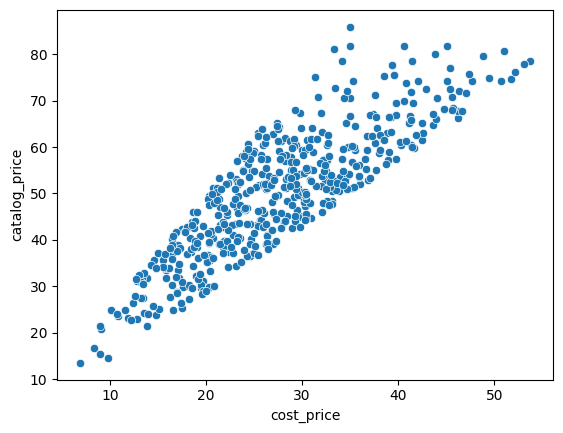

In [7]:
sns.scatterplot(x='cost_price', y='catalog_price', data=products)
plt.show()

Generate median of these values to see the average estimated revenue per item

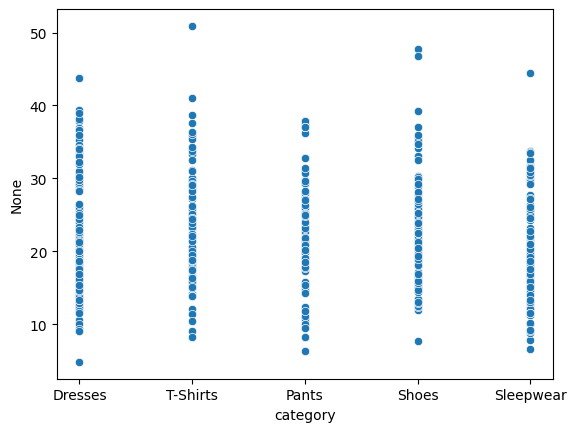

In [8]:
revenue = products['catalog_price'] - products['cost_price']

sns.scatterplot(x=products['category'], y=revenue, data=products)
plt.show()

In [ ]:
products.groupby()

This data has problems. Will tidy this data before proceeding. Opening a separate excel window to see which values belong to which variable

In [9]:
pivot = data['Pivot Table']
pivot

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Channels,Totals Of Original Price,NaN,NaN,NaN,NaN,NaN
2,App Mobile,53952.79,NaN,NaN,NaN,NaN,NaN
3,E-commerce,57167.84,NaN,NaN,NaN,NaN,NaN
4,Grand Total,111120.63,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Type Product,Total Catalog Price,Total Cost Price,NaN,NaN,NaN,NaN
9,Dresses,5298.44,2917.77,NaN,NaN,NaN,NaN


In [10]:
channel_data = {'Channels' : ['App Mobile', 'E-commerce'],
                'Totals Of Original Price' : [53952.79, 57167.84]}

types_data = {'Type Product' : ['Dresses', 'Pants', 'Shoes', 'Sleepwear', 'T-Shirt', 'Grand Total'],
         'Total Catalog Price' : [5298.44, 3959.36, 5236.03, 4933.21, 5511.98, 24939.02], 
         'Total Cost Price' : [2917.77, 2149.76, 2908.44, 2785.75, 2962.69, 13724.41]}

channel = pd.DataFrame(channel_data)
types = pd.DataFrame(types_data)

In [11]:
channel

,Channels,Totals Of Original Price
0,App Mobile,53952.79
1,E-commerce,57167.84


In [12]:
types

,Type Product,Total Catalog Price,Total Cost Price
0,Dresses,5298.44,2917.77
1,Pants,3959.36,2149.76
2,Shoes,5236.03,2908.44
3,Sleepwear,4933.21,2785.75
4,T-Shirt,5511.98,2962.69
5,Grand Total,24939.02,13724.41


In [13]:
pivot = pivot.dropna()
pivot = pivot.drop(19)
pivot = pivot.rename(columns={'Unnamed: 0' : 'Row Labels', 'Unnamed: 1' : 'Dresses', 'Unnamed: 2' : 'Pants', 
                      'Unnamed: 3' : 'Shoes','Unnamed: 4' : 'Sleepwear', 'Unnamed: 5' : 'T-Shirts', 
                      'Unnamed: 6' : 'Grand Total'})
pivot

,Row Labels,Dresses,Pants,Shoes,Sleepwear,T-Shirts,Grand Total
20,Black,18,13,26,26,21,104
21,Blue,26,17,23,13,23,102
22,Green,16,19,18,28,21,102
23,Red,27,14,19,18,20,98
24,White,22,16,14,19,23,94
25,Grand Total,109,79,100,104,108,500


Looking at the numerical values of each column in data

Trying to see if there are any missing values or duplicates.
Finding the median and graphing the values to find outliers.
Seeing if there is imbalance in the dataset
Trying to also see any trends

In [15]:
sales_items = data['SalesItems']

sales_items

,quantity,original_price,unit_price,item_total,channel,channel_campaigns
0,1,81.80,81.80,81.80,App Mobile,App Mobile
1,1,81.79,81.79,81.79,E-commerce,Website Banner
2,1,80.76,80.76,80.76,App Mobile,App Mobile
3,1,78.52,78.52,78.52,App Mobile,App Mobile
4,1,78.52,78.52,78.52,App Mobile,App Mobile
...,...,...,...,...,...,...
2248,5,20.82,20.82,104.10,E-commerce,Website Banner
2249,5,20.82,20.82,104.10,E-commerce,Website Banner
2250,5,28.98,20.29,101.43,App Mobile,App Mobile
2251,5,16.69,16.69,83.45,App Mobile,App Mobile


This dataframe has the catalog price with the category. see which price matches up with the sales_items dataframe to finally see the category generating the most profit. See the color too

In [109]:
filtered_products = products[['category', 'color', 'catalog_price', 'cost_price']]

filtered_products

,category,color,catalog_price,cost_price
0,Dresses,Green,40.41,20.70
1,T-Shirts,White,78.45,53.76
2,T-Shirts,Green,23.90,14.81
3,T-Shirts,White,60.00,34.78
4,Pants,Blue,36.84,16.46
...,...,...,...,...
495,Pants,Black,54.61,27.63
496,Dresses,Black,36.05,20.73
497,T-Shirts,White,38.33,16.23
498,Sleepwear,Green,30.07,20.82


Website banners seem to be the most effective at bringing in customers

In [16]:
sales_items['channel_campaigns'].value_counts()

channel_campaigns
Website Banner    1151
App Mobile         963
Social Media       120
Email               19
Name: count, dtype: int64

On average, customers spend $47.73. Without any potetial outliers, customers spend $49.76 on average

In [50]:
sales_items['unit_price'].median()

np.float64(47.73)

In [91]:
sales_items['item_total'].describe()

count    2253.000000
mean      143.913298
std        82.153406
min        13.510000
25%        74.700000
50%       130.500000
75%       198.750000
max       403.800000
Name: item_total, dtype: float64

Finding the total revenue of sales and the projected revenue. Customers frequently buy multiple of the same items which increased the revenue

In [90]:
projected = types.iloc[5, 1] - types.iloc[5, 2]
profit = sales_items['item_total'].sum() - types.iloc[5, 2]

print(f"Projected: {projected}. Profit: {profit}")

Projected: 11214.61. Profit: 310512.25


Relationship between unit price and original price. This is to see if customers are usually paying less than the marketed price. It seems like a lot of customers pay the original price, however, discounts happen a lot. Higher discounts seem to occur more than lower discounts.

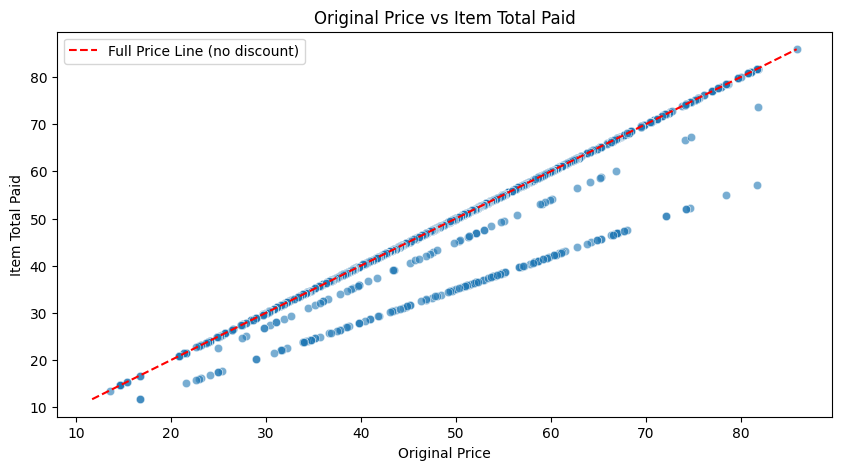

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=sales_items, x='original_price', y='unit_price', alpha=0.6)

# Add a diagonal line where item_total equals original_price (full price line)
min_price = min(sales_items['original_price'].min(), sales_items['unit_price'].min())
max_price = max(sales_items['original_price'].max(), sales_items['unit_price'].max())
plt.plot([min_price, max_price], [min_price, max_price], 
         color='red', linestyle='--', label='Full Price Line (no discount)')

plt.xlabel("Original Price")
plt.ylabel("Item Total Paid")
plt.title("Original Price vs Item Total Paid")
plt.legend()
plt.show()


Seeing the profit with the discounts. It seems like social media tend to have the highest rate of customers not paying the full price while website banner has the lowest.

In [46]:
sales_items['discount'] = sales_items['quantity'] * sales_items['original_price'] - sales_items['item_total']
channel_discount = sales_items.groupby('channel_campaigns')['discount'].mean().sort_values(ascending=False)

channel_discount

channel_campaigns
Social Media      34.531833
Email              6.796842
App Mobile         2.739605
Website Banner     0.635725
Name: discount, dtype: float64

It seems like here are cycles for prices being high and low. Perhaps when a product gets released or when a specific time happens (season is an example) the price is at its highest. However, when the product gets older or when the time passes then the price drops

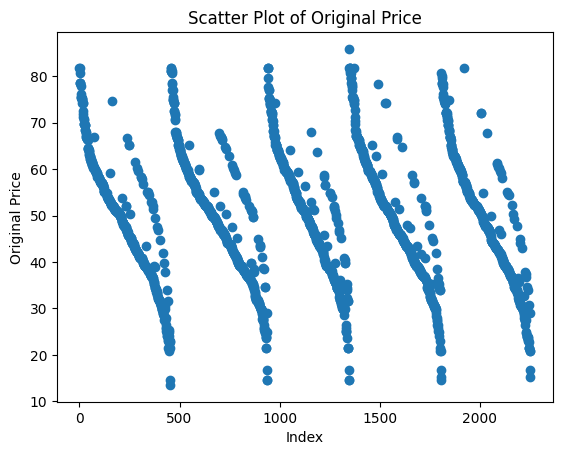

In [22]:
plt.scatter(sales_items.index, sales_items['original_price'])
plt.xlabel("Index")
plt.ylabel("Original Price")
plt.title("Scatter Plot of Original Price")
plt.show()

This perhaps shows the total amount of money a customer spent during their shopping trip. It seems like customers are buying more items in later cycles. The customers spending more money overtime shows a more positive outlook in predicting future revenue

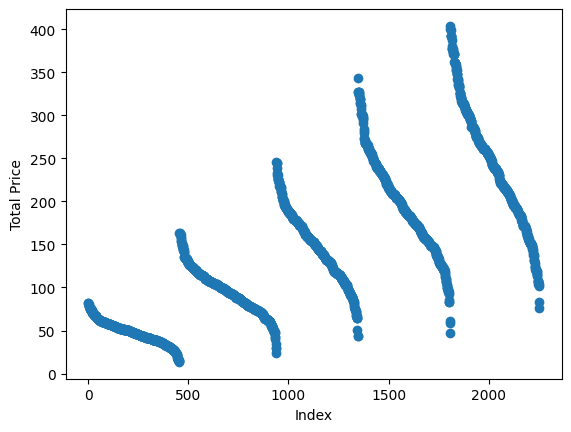

In [23]:
plt.scatter(sales_items.index, sales_items['item_total'])
plt.xlabel("Index")
plt.ylabel("Total Price")
plt.show()

unfinished

In [25]:
#binning to see value counts
bins = [13.51, 31.84, 51.00, 85.9]
labels = ["small", "medium", "large"]

df = pd.cut(sales_items['original_price'], bins=bins, labels=labels, right=False)

df.value_counts().sort_index()

original_price
small      206
medium    1006
large     1040
Name: count, dtype: int64

Trying to see if there is multicollinearity. 

unit_price and original_price are 0.95
quanity and item_total are 0.84

multiple channel columns have high correlation (however this may be the result of the dummy variable trap. Will drop one value from each variable to handle this)

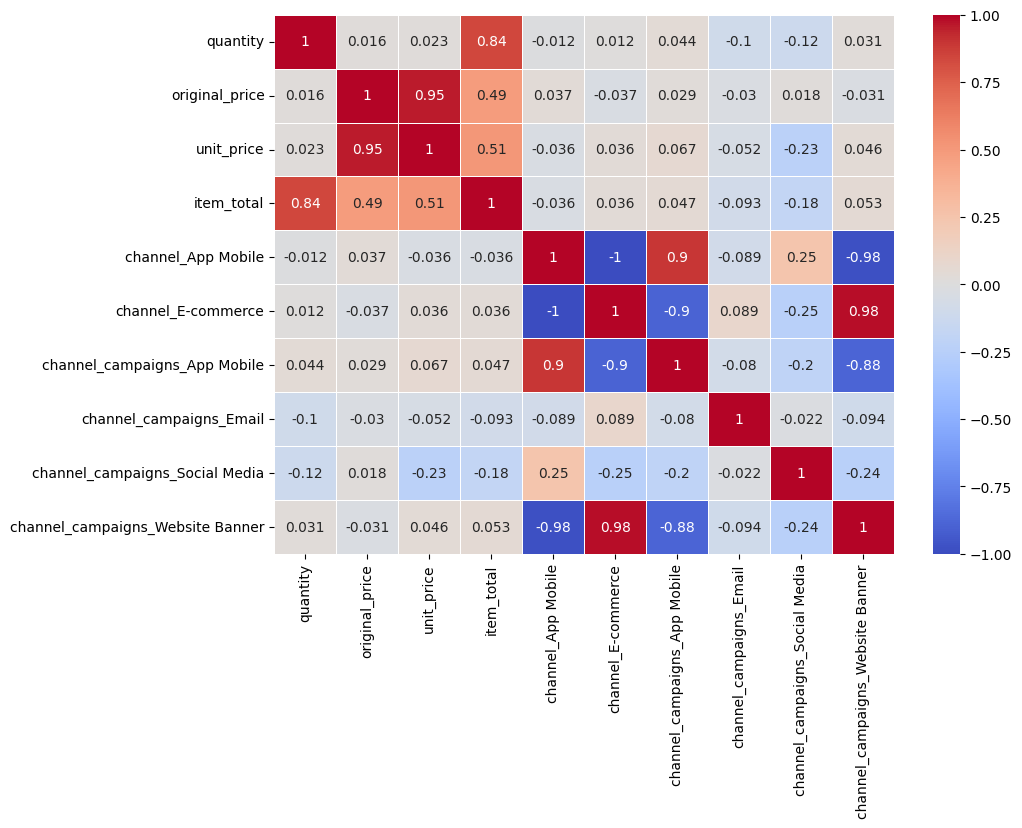

In [26]:
import seaborn as sns

encoded_sales = pd.get_dummies(sales_items)
correlation_matrix = encoded_sales.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()